## Vamos a generar una piramide de poblacion, importando los datos desde INE, y generando el gráfico con matplotlib

Empezamos importando las librerias necesarias : 

In [130]:
import matplotlib

In [131]:
#from plotly.graph_objs import *

In [132]:
import matplotlib.pyplot as plt

In [133]:
import pandas as pd

In [134]:
import numpy as np

In [135]:
import plotly.graph_objs as go

In [136]:
import plotly.plotly as py

In [137]:
import datetime, requests

con esta lineas le pedimos a matplotlib que nos presente los graficos en este notebook

In [138]:
%matplotlib inline

Generamos un par de plantillas para facilitar la generacion de la URL para atacar el webservice del INE

In [139]:
url_plantilla_Serie = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

In [140]:
url_plantilla_Tabla= 'http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/{codigo}?nult={num_datos}'

En la siguientes lineas se define el código de la query a descargar y el número  de datos que refiere al numero de periodos. Estamos trabajando con un tipo de datos disponible desde el año 200, con dos publicaciones por año, luego con 30/35 seria suficiente..aun asi empece a usar 100 y así lo deje..

In [151]:
codigo = "9663"

In [152]:
num_datos=100

Preparamos el string con el URL correcto con el que solicitar los datos a través del web service de www.ine.es

In [153]:
url = url_plantilla_Tabla.format(codigo=codigo,num_datos=num_datos)

Con la plantilla ya preparada solicitamos la informacion 

In [154]:
respuesta_poblacion = requests.get(url)

Ya la tenemos, y preparamos un pandas con la respuesta en formato json. Seguro que se puede utilizar otros muchos formatos, yo he decidido empezar por json, cuando tenga suficiente destreza probaré con otros formatos.

In [155]:
datos_poblacion=pd.DataFrame(respuesta_poblacion.json())

Jugemos un poco para entender la estructura de la información descargada...

In [156]:
datos_poblacion.loc[[2]]

,COD,Data,FK_Escala,FK_Unidad,Nombre
2,CP300334,"[{'Fecha': 1483225200000, 'FK_TipoDato': 2, 'F...",1,3,Total Nacional. Todas las edades. Mujeres. Pob...


In [157]:
datos_poblacion.columns

Index(['COD', 'Data', 'FK_Escala', 'FK_Unidad', 'Nombre'], dtype='object')

In [158]:
len(datos_poblacion)

324

Vemos que tenemos 324 series de datos...veamos ahora que hay las tres columnas que mas nos importan : COD: como código de esa tabla especifica, Data : campo de datos con los valores correspondientes a esa tabla desde 2002 hasta 2017 y Nombre : nombre de la tabla..

In [159]:
datos_poblacion[['COD','Nombre']]

,COD,Nombre
0,CP335,Total Nacional. Todas las edades. Total. Pobla...
1,CP300335,Total Nacional. Todas las edades. Hombres. Pob...
2,CP300334,Total Nacional. Todas las edades. Mujeres. Pob...
3,CP300333,Total Nacional. 0 años. Total. Población. Núme...
4,CP300332,Total Nacional. 0 años. Hombres. Población. Nú...
5,CP300331,Total Nacional. 0 años. Mujeres. Población. Nú...
6,CP300330,Total Nacional. 1 año. Total. Población. Número.
7,CP300329,Total Nacional. 1 año. Hombres. Población. Núm...
8,CP300328,Total Nacional. 1 año. Mujeres. Población. Núm...
9,CP300327,Total Nacional. 2 años. Total. Población. Núme...


Varios apuntes importantes :
a) En la columna 'Nombre' hay información relevante, pero concatenadas en el string. Tendremos que trabajarla más adelante para extraer esa información. 
b) Las líneas 0,1,2,318,319 y 320 tienen un formato diferente, y no nos dan informacion relevante en este ejercicio asi que he decidido eliminarlas
c) No he incluido la columna Data para facilidad de lectura, aunque podemos ver un ejemplo aqui :

In [160]:
datos_poblacion.drop([0,1,2,318,319,320],inplace=True)

In [161]:
datos_poblacion.loc[[200]]['Data'].values[0]

[{'Anyo': 2017,
  'FK_Periodo': 26,
  'FK_TipoDato': 2,
  'Fecha': 1483225200000,
  'Secreto': False,
  'Valor': 246464.0},
 {'Anyo': 2016,
  'FK_Periodo': 27,
  'FK_TipoDato': 2,
  'Fecha': 1467324000000,
  'Secreto': False,
  'Valor': 244368.0},
 {'Anyo': 2016,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1451602800000,
  'Secreto': False,
  'Valor': 242277.0},
 {'Anyo': 2015,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1435701600000,
  'Secreto': False,
  'Valor': 248047.0},
 {'Anyo': 2015,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1420066800000,
  'Secreto': False,
  'Valor': 254064.0},
 {'Anyo': 2014,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1404165600000,
  'Secreto': False,
  'Valor': 260274.0},
 {'Anyo': 2014,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1388530800000,
  'Secreto': False,
  'Valor': 266616.0},
 {'Anyo': 2013,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1372629600000,
  'Secreto': False,
  'Valor': 255873.0},
 {'Anyo'

La estructura de Data es la de una lista con diccionarios como valores, cada uno de los diccionarios se refiere a un año, en realidad hay dos diccionarios por año correspondientes a las dos publicaciones : Enero y Julio..Las claves de los diccionarios son 'Anyo', FK_Periodo, FK_Tipo_dato, 'Fecha','Secreto' y 'Valor'. La Fecha esta en formato DateTime/TimeStamp, veamos un ejemplo: aqui sacamos al informacion correspondiente al registro #100 y al sexto registro de su 'Data' (indice 5 corresponde a registro sexto) : 

In [162]:
print ('Serie {}\nNombre {}\nAño {}\nFecha {}\nValor {:,.0f}'.format(
                                                    datos_poblacion.loc[[100]]['COD'].values[0],
                                                    datos_poblacion.loc[[100]]['Nombre'].values[0],
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Anyo'],
                                                    datetime.date.fromtimestamp(datos_poblacion.loc[[100]]['Data'].values[0][5]['Fecha']/1000),
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Valor']
                                                )
      )

Serie CP300236
Nombre Total Nacional. 32 años. Hombres. Población. Número. 
Año 2014
Fecha 2014-07-01
Valor 339,003


Esto se lee tal que : la serie CP300236 correspondiente a Total Nacional. 32 añosa Hombre.Poblacion.Numero en su registro sexto , correspondiente al ejercicioo de Julio 2014 nos da una poblacion de 339.003 personas..

y aqui un poco de código para ver por pantalla todos los datos importados. He quitado 3 periodos y he dividido la poblacion por mil para facilitar su vision en pantalla

In [275]:
annyos=list()
for x in datos_poblacion.index:
    print ('\nEdad {} años, genero {}'.format(
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_edad).values[0],
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]
          )
          )
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        if y!=len(datos_poblacion.loc[[x]]['Data'].values[0])-4:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]),end='')   
        else:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]))
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        print ('{:2.0f} '.format(datos_poblacion.loc[[x]]['Data'].values[0][y]['Valor']/1000),end='')


Edad 0 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
408 410 419 418 426 420 425 433 453 462 476 475 484 480 494 503 520 503 494 482 484 472 467 456 455 443 443 429 
Edad 0 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
210 211 216 216 220 217 219 223 234 238 245 245 250 248 255 261 268 260 255 249 250 243 240 235 235 228 228 221 
Edad 0 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
198 199 203 202 206 204 206 210 220 224 231 230 234 232 239 243 251 243 239 233 234 229 227 221 220 214 215 208 
Edad 1 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
424 426 430 427 426 439 453 464 476 479 484 489 495 508 521 510 498 494 490 482 474 467 462 455 449 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
250 249 248 245 242 238 233 232 232 232 233 229 225 222 219 218 217 214 211 209 208 207 207 210 212 214 217 215 
Edad 11 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
237 234 233 231 230 225 221 220 220 219 218 216 214 210 206 206 206 203 201 199 197 196 196 198 201 203 206 203 
Edad 12 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
482 477 472 463 454 452 451 451 451 446 441 434 426 426 426 422 418 415 413 411 409 414 419 423 429 424 421 421 
Edad 12 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
248 245 242 238 233 232 231 232 233 230 226 223 220 219 219 216 214 213 212 211 211 213 216 218 220 218 217 216 
Edad 12 año

444 450 458 464 472 471 472 477 484 491 499 506 513 519 527 536 545 554 561 564 566 568 573 587 597 602 612 623 
Edad 22 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
227 230 234 237 240 240 241 243 246 250 254 257 260 264 268 273 278 283 287 289 289 291 293 301 306 308 314 319 
Edad 22 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
217 220 224 228 232 231 231 234 238 242 246 249 252 255 259 263 267 271 274 276 277 278 280 286 291 294 298 304 
Edad 23 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
463 469 476 474 474 477 483 490 500 508 517 523 530 540 550 563 575 585 592 594 594 605 617 627 633 640 652 656 
Edad 23 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

612 631 651 669 686 708 730 748 765 788 810 818 825 833 841 839 835 829 820 802 783 773 766 754 739 726 716 705 
Edad 33 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
305 316 326 336 346 358 369 379 389 403 416 422 426 431 435 435 434 431 426 416 406 401 396 389 381 373 368 361 
Edad 33 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
307 316 325 333 341 350 360 368 376 385 394 396 398 402 406 404 401 398 394 386 377 373 369 364 358 353 348 344 
Edad 34 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
651 667 683 703 724 739 754 778 802 812 822 831 839 837 835 832 828 814 798 789 779 765 752 743 731 718 709 700 
Edad 34 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

775 769 764 760 757 755 754 754 754 758 762 752 742 739 737 741 746 726 706 691 675 663 653 653 652 639 628 619 
Edad 44 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
394 391 388 387 385 384 383 383 383 385 387 382 377 375 373 376 378 368 357 349 340 334 328 328 327 320 314 309 
Edad 44 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
381 378 376 374 372 371 371 371 371 373 375 370 365 364 364 366 368 358 349 342 334 329 325 325 325 319 314 309 
Edad 45 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
763 758 754 752 750 749 748 752 757 749 741 739 736 741 746 728 709 696 683 671 659 658 658 647 634 624 615 606 
Edad 45 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
328 329 330 326 322 319 316 313 311 301 291 287 283 277 271 271 270 269 268 260 251 248 245 250 255 261 266 254 
Edad 56 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
652 643 635 629 623 616 610 591 572 565 558 545 532 533 534 533 532 515 498 491 485 494 503 514 526 502 478 467 
Edad 56 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
322 318 314 311 308 304 301 292 282 279 275 269 262 263 264 264 264 255 245 242 239 243 246 252 258 246 235 229 
Edad 56 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
330 326 321 318 315 312 309 299 290 286 282 276 271 270 270 269 269 261 252 249 246 251 256 262 268 255 243 238 
Edad 57 año

479 491 504 483 463 454 445 456 468 458 449 446 444 415 386 372 358 399 442 370 297 318 339 360 382 402 423 417 
Edad 67 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
227 234 240 230 221 216 211 217 222 218 213 212 211 197 184 177 170 190 209 174 139 149 159 169 179 187 196 194 
Edad 67 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
252 258 264 253 243 238 234 240 246 241 235 234 233 217 202 194 187 210 232 195 158 169 180 191 202 215 227 223 
Edad 68 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
499 478 458 449 441 452 463 453 444 442 440 411 382 368 354 396 438 366 295 315 336 357 379 399 419 414 408 408 
Edad 68 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
279 296 314 329 346 341 337 337 337 341 347 346 345 336 329 330 332 323 315 313 313 303 294 294 296 289 282 280 
Edad 78 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
120 127 135 141 147 146 145 144 144 146 148 147 146 143 140 139 139 135 132 131 130 126 122 122 122 119 116 115 
Edad 78 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
158 168 178 188 198 195 193 192 193 196 199 199 198 193 189 191 193 188 183 183 183 177 172 172 174 170 167 166 
Edad 79 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
304 319 334 330 326 326 325 330 335 333 333 325 317 318 320 311 303 302 301 292 283 283 284 277 271 269 267 263 
Edad 79 año

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
89 88 88 86 84 83 82 80 79 78 78 74 70 69 67 62 57 57 57 56 54 53 52 51 52 51 51 51 
Edad 90 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
115 112 108 106 106 104 102 100 98 94 91 87 84 78 71 70 70 68 66 64 63 63 62 62 62 61 60 60 
Edad 90 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
37 36 34 33 33 32 32 31 30 29 28 27 25 23 21 20 20 19 19 18 18 18 18 18 18 17 17 17 
Edad 90 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
78 76 74 73 73 71 70 69 68 65 62 61 59 55 50 50 50 48 47 46 45 45 44 44 45 44 43 43 
Edad 91 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

Empezemos pues a trabajar los datos para poder generar la Piramide buscada...

En primer lugar generamos un par de funciones auxiliares para poder trabajar el campo 'nombre, que como hemos visto lleva contenadas informacion relevante sobre  el tipo de tabla, la edad, y el género (Hombre/Mujer/Total)

In [163]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

In [164]:
spliteador_genero=lambda x: x.split('.')[2].strip()

In [165]:
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

A continuacion vamos a definir un pandas filtrando los valores correspondientes a Genero = Hombre o Mujer, ,es decir Genero diferente de Total ---> !='Total'. A partir de ahí definiremos un par de listas, una para 'Hombres' y otra para 'Mujeres', correspondientes al año 2017. Cada elemento de esas listas contendra a su vez dos campos : edad y valor (población). Me costó llegar a esa lista definida de forma comprensiva, es lo más "pythonico" que he conseguido escribir, pero seguro que hay maneras más elegantes. Posterioremente definimos un par de pandas que "merge" en uno solo que llamamos panda_poblacion. En este tendremos tres columnas : 'Edad', 'Hombres', 'Mujeres'..y estaremos listos para dibujar las gráficas.

In [166]:
df1=datos_poblacion[datos_poblacion['Nombre'].apply(spliteador_genero)!='Total']

In [167]:
dict_poblacion=[[df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0],int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']]
                   for x in df1.index for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [168]:
lista_hombres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Hombres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [169]:
lista_mujeres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Mujeres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [170]:
panda_hombres=pd.DataFrame(lista_hombres,columns=['Edad','Hombres'])
panda_mujeres=pd.DataFrame(lista_mujeres,columns=['Edad','Mujeres'])

In [171]:
panda_poblacion=pd.merge(panda_hombres,panda_mujeres,on='Edad')

Hacemos un primer intento con una grafica clasica de lineas en la que pintamos poblacion separada de Mujeres y Hombres en función de la edad.

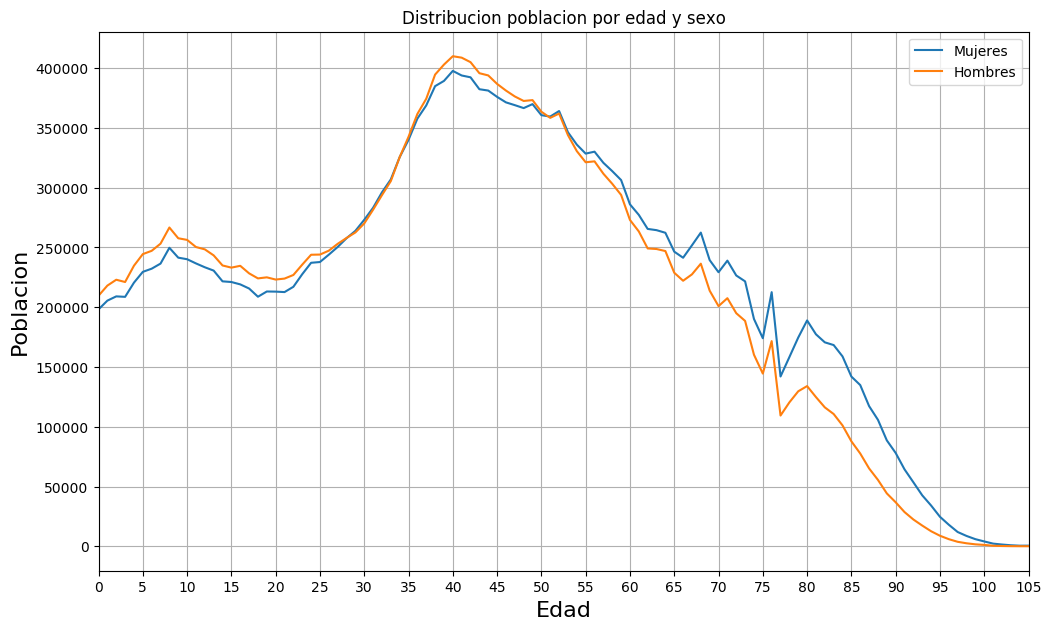

In [201]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Mujeres'],
         panda_poblacion['Edad'],panda_poblacion['Hombres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion',size=16)
plt.grid()
plt.legend(['Mujeres','Hombres'])
plt.title('Distribucion poblacion por edad y sexo')

..y la gráfica con población total : 

([<matplotlib.axis.XTick at 0x118d562b0>,
 <a list of 11 Text xticklabel objects>)

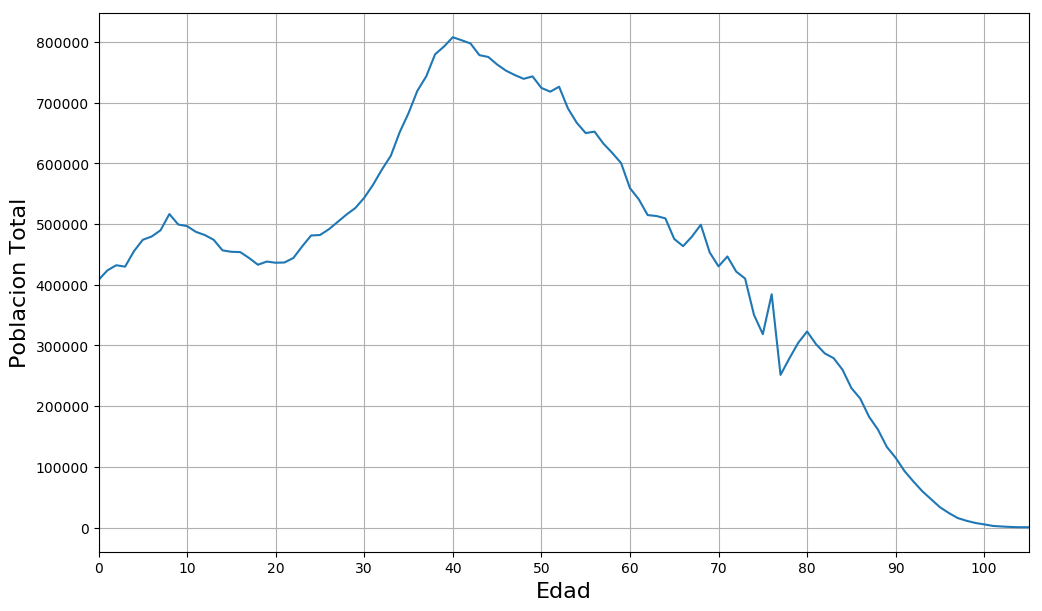

In [202]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Hombres']+panda_poblacion['Mujeres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion Total',size=16)
plt.grid()
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],['0','10','20','30','40','50','60','70','80','90','100'])

Como curiosidad saquemos la edad en la que hay mayor población :

In [207]:
panda_poblacion.loc[[panda_poblacion['Hombres'].idxmax()]]

,Edad,Hombres,Mujeres
40,40,409914.0,397629.0


In [210]:
panda_poblacion.loc[[panda_poblacion['Mujeres'].idxmax()]]

,Edad,Hombres,Mujeres
40,40,409914.0,397629.0


In [ ]:
y finalmente sacamos el grafico con la Piramide de poblacion para 2017

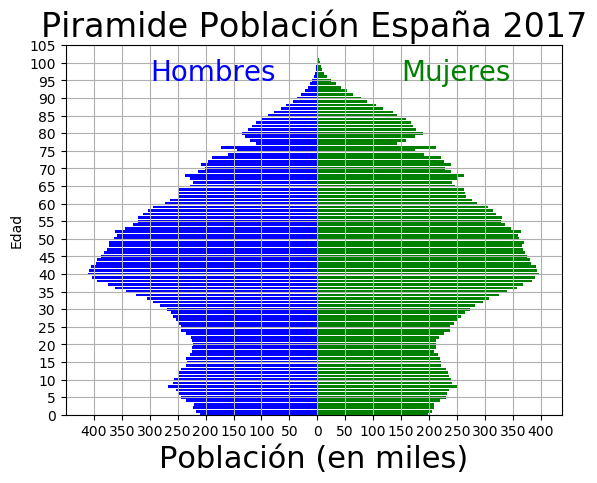

In [216]:
plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = panda_poblacion['Edad']
ax.barh(y_pos, panda_poblacion['Mujeres'], align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-panda_poblacion['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
ax.set_xticks([-400000,-350000,-300000,-250000,-200000,-150000,-100000,-50000,0,
               50000,100000,150000,200000,250000,300000,350000,400000,])
ax.set_xticklabels(['400','350','300','250','200','150','100','50','0'
                    ,'50','100','150','200','250','300','350','400'])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Población (en miles)',size=22)
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,105)
ax.set_title('Piramide Población España 2017',size=24)
ax.grid(True)
plt.text(150000, 95, 'Mujeres',color='green',size=20)
plt.text(-300000,95,'Hombres',color='blue',size=20)
plt.rcParams["figure.figsize"]=[12,7]
plt.show()